In [ ]:
import pandas as pd 
import numpy as np
from google.colab import widgets
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', header=None)
names = ["Id", "RI", "Na","Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
data.columns = names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data_fillna_mean['Class'].value_counts().index

Index(['building_non_float', 'building_float', 'headlamps', 'vehicle_float',
       'containers', 'tableware'],
      dtype='object')

In [ ]:
data_fillna_mean['Class'].mode()

0    building_non_float
dtype: object

In [ ]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
#1 задание
from sklearn.decomposition import PCA
pca = PCA()
pca.fit( data_fillna_mean[data_fillna_mean.columns.values
                          [data_fillna_mean.columns.values != 'Class']] )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_*100)

[4.76205247e+01 2.63192760e+01 1.07800432e+01 1.02024637e+01
 3.30672372e+00 1.60477360e+00 1.42743130e-01 2.34365001e-02
 1.53917702e-05]


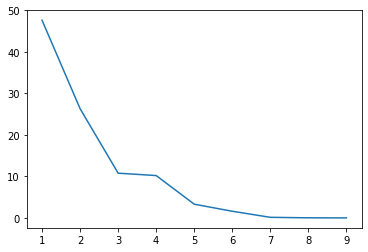

In [ ]:
_, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show()

In [ ]:
pcaData=pd.DataFrame(
    pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']]))
pcaNames=[]
for i in range(9):
  pcaNames.append('pc'+str(i+1))
pcaData.columns=pcaNames
pcaData.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.431425,-1.102115,-1.066958,-0.158237,0.143080,-0.081096,-0.067756,0.011377,-0.000945
1,-1.436707,0.343585,-0.277824,-0.293937,-0.194434,-0.050149,-0.043168,-0.017048,-0.000955
2,-1.427322,0.345720,0.138708,-0.321984,0.023720,-0.189375,-0.045462,0.019612,-0.000351
3,-1.257825,-0.249060,0.057742,0.022271,0.002472,0.016129,-0.046219,0.087868,-0.000471
4,-1.312466,-0.018405,0.357510,-0.278564,-0.071025,0.084925,-0.054818,-0.001803,-0.000694


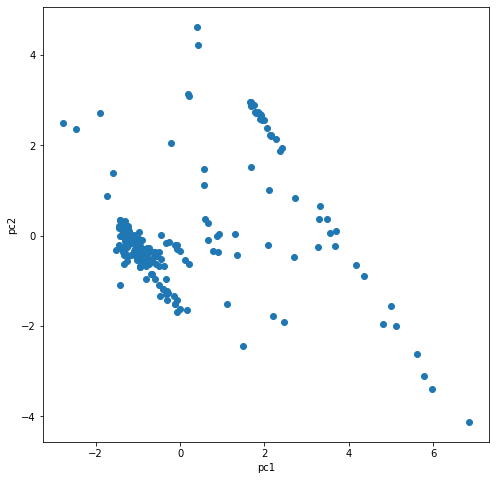

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(pcaData['pc1'], pcaData['pc2'])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

plt.show()

In [ ]:
pcaData['Class'] = data_fillna_mean['Class'].copy()

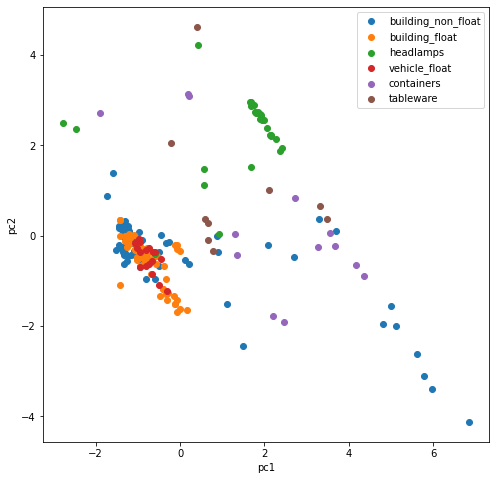

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData[col1][ pcaData['Class']==glassType ],
             pcaData[col2][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

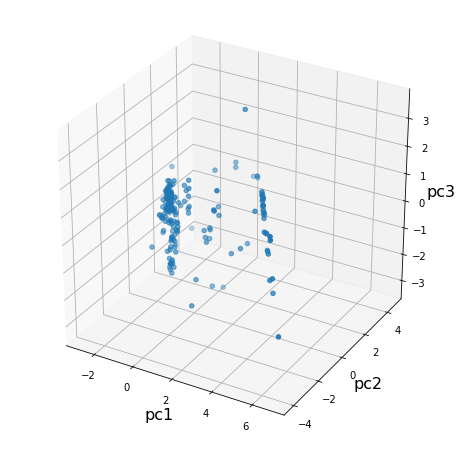

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter(pcaData['pc1'], pcaData['pc2'], pcaData['pc3'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)

plt.show()

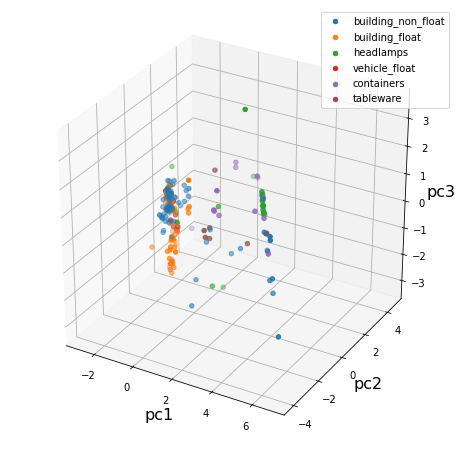

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData['pc1'][ pcaData['Class']==glassType ], 
             pcaData['pc2'][ pcaData['Class']==glassType ], 
             pcaData['pc3'][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

In [ ]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


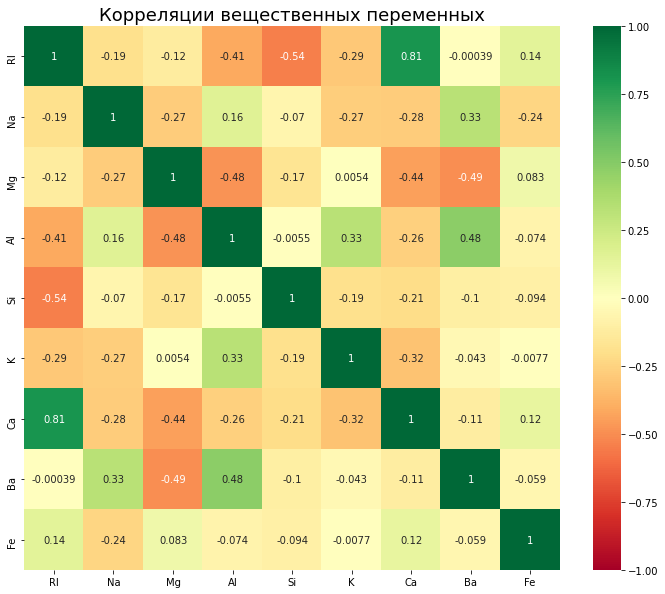

In [ ]:
#2 задание
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')

ax.set_title('Корреляции вещественных переменных', fontsize=18)

plt.show()

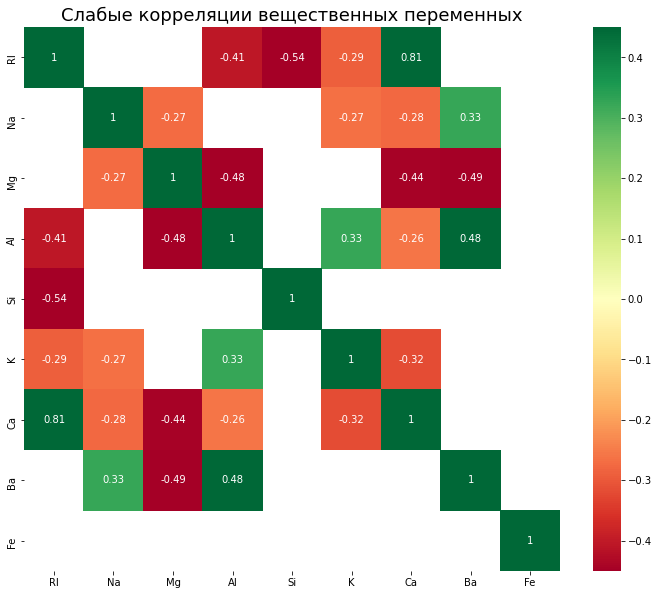

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(corr>=0.25)|(corr<=-0.25)], annot=True, vmax=0.45, vmin=-0.45, cmap='RdYlGn')

ax.set_title('Слабые корреляции вещественных переменных', fontsize=18)

plt.show()

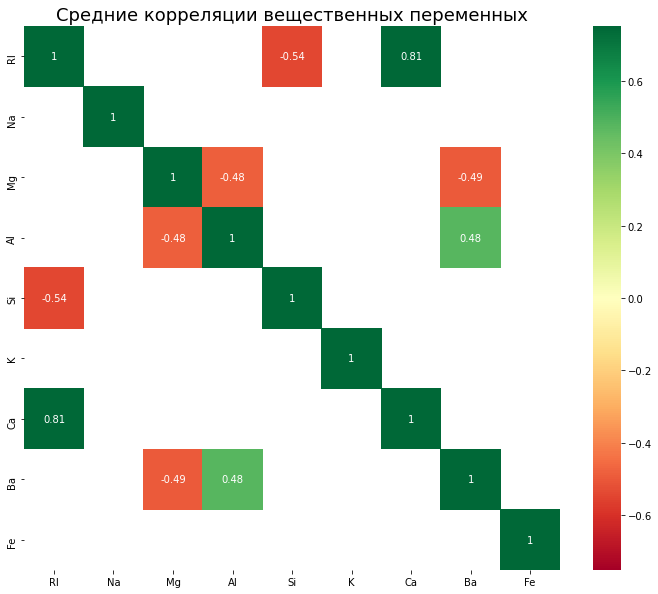

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(corr>=0.45)|(corr<=-0.45)], annot=True, vmax=0.75, vmin=-0.75, cmap='RdYlGn')

ax.set_title('Средние корреляции вещественных переменных', fontsize=18)

plt.show()